In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
import sklearn.metrics
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file
data = pd.read_csv('/kaggle/input/trained-sounds/trained_all_data_sound_bird_clef_2023.csv')

In [3]:
data.head()

,filename,prediction,confidence
0,/kaggle/input/birdclef-2023/train_audio/yetgre...,Animal,0.269651
1,/kaggle/input/birdclef-2023/train_audio/yetgre...,Animal,0.373487
2,/kaggle/input/birdclef-2023/train_audio/yetgre...,Animal,0.152945
3,/kaggle/input/birdclef-2023/train_audio/yetgre...,Insect,0.648034
4,/kaggle/input/birdclef-2023/train_audio/yetgre...,Frog,0.766068


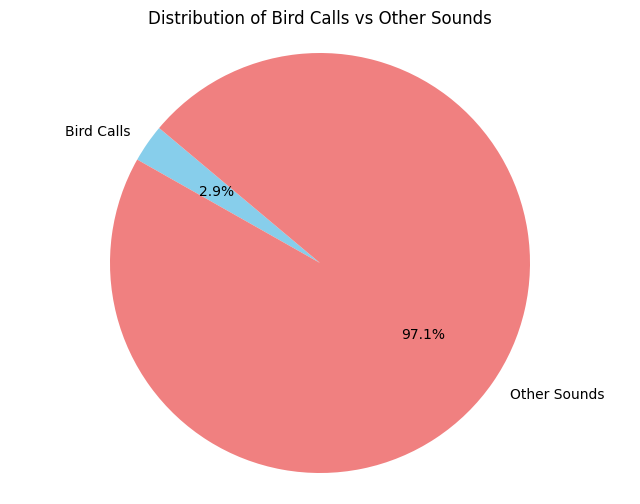

In [4]:
# Calculate the percentage of bird calls in the data
bird_calls_percentage = (data[data['prediction'] == 'Bird'].shape[0] / data.shape[0]) * 100

# Data for the pie chart
labels = ['Bird Calls', 'Other Sounds']
sizes = [bird_calls_percentage, 100 - bird_calls_percentage]
colors = ['skyblue', 'lightcoral']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Bird Calls vs Other Sounds')
plt.axis('equal')
plt.show()

In [5]:
# Which birds are calling in long recordings from confidence score?

long_recordings = data[data['confidence'] > 0.8]

# Filter for bird calls only
long_bird_calls = long_recordings[long_recordings['prediction'] == 'Bird']

In [6]:
# Extract unique bird species from long recordings
long_bird_calls['species_name'] = long_bird_calls['filename'].apply(lambda x: x.split('/')[-2])

<ipython-input-6-7b5ad3078624>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_bird_calls['species_name'] = long_bird_calls['filename'].apply(lambda x: x.split('/')[-2])


In [7]:
unique_bird_species_long_calls = long_bird_calls['species_name'].unique()
unique_bird_species_long_calls

array(['wlwwar', 'carcha1', 'varsun2', 'sincis1', 'blbpuf2', 'colsun2',
       'yelbis1', 'yewgre1', 'pitwhy', 'brican1', 'yeccan1', 'tafpri1',
       'beasun2', 'afpfly1', 'bcbeat1', 'kerspa2', 'cohmar1', 'cibwar1',
       'woosan', 'afghor1', 'hoopoe', 'broman1', 'wbrcha2', 'whbcan1',
       'somgre1', 'hunsun2', 'gabgos2', 'yefcan', 'lawgol', 'gyhspa1',
       'afdfly1', 'sacibi2', 'piekin1', 'barswa', 'edcsun3'], dtype=object)

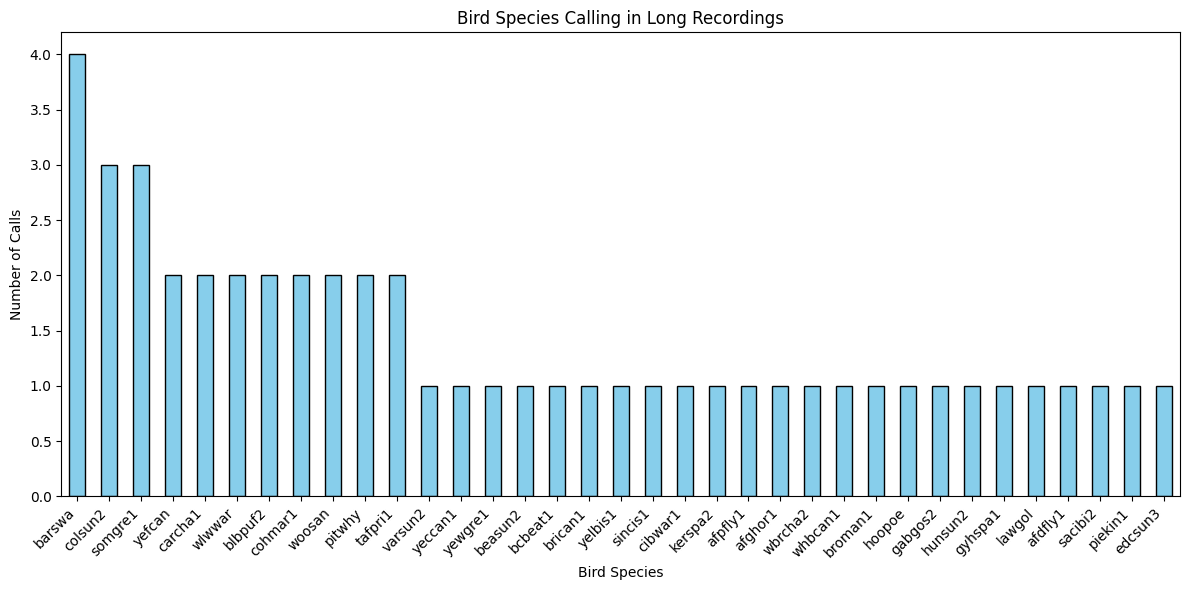

In [8]:
# Visualize results of each bird species in long recordings

species_counts = long_bird_calls['species_name'].value_counts()

# Plot the bar graph
plt.figure(figsize=(12, 6))
species_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bird Species Calling in Long Recordings')
plt.xlabel('Bird Species')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
# Filter the dataset for bird species
bird_species_data = data[data['prediction'] == 'Bird']

In [10]:
# Extract the species name from the filename and update the dataframe
bird_species_data['species_name'] = bird_species_data['filename'].apply(lambda x: x.split('/')[-2])

<ipython-input-10-09ebfc1d7e2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bird_species_data['species_name'] = bird_species_data['filename'].apply(lambda x: x.split('/')[-2])


In [11]:
# Drop the filename column
bird_species_data = bird_species_data.drop(columns=['filename'])

In [12]:
# Group the bird species data by species name and calculate the call frequency
species_call_frequency = bird_species_data.groupby('species_name').size().reset_index(name='call_frequency')

species_call_frequency

,species_name,call_frequency
0,afdfly1,2
1,afecuc1,2
2,affeag1,2
3,afghor1,2
4,afmdov1,1
...,...,...
108,yefcan,7
109,yelbis1,1
110,yertin1,5
111,yespet1,2


In [13]:
# Identify the top 5 bird species with the highest call frequencies
top_5_species = species_call_frequency.nlargest(5, 'call_frequency')

top_5_species

,species_name,call_frequency
68,rbsrob1,23
23,carcha1,22
57,laudov1,17
102,wlwwar,12
30,colsun2,11


In [14]:
# Label encode species name
label_encoder = LabelEncoder()

In [15]:
bird_species_data['species_name_encoded'] = label_encoder.fit_transform(bird_species_data['species_name'])

In [16]:
# Setup x as confidence score and y as species name encoded
x = bird_species_data['confidence']
y = bird_species_data['species_name_encoded']

In [17]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [18]:
# Perform one-hot encoding on the species_name_encoded column
one_hot_encoded = pd.get_dummies(bird_species_data['species_name_encoded'], prefix='species')

# Reshape x to 2D array 
x_reshaped = np.array(x).reshape(-1, 1)

In [19]:
# Initialize the neural network model
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

In [20]:
# Perform cross-validation
cv_scores = cross_val_score(nn_model, x_reshaped, y, cv=5)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [21]:
# Fit the model and predict probabilities
nn_model.fit(x_reshaped, y)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

In [22]:
y_pred_proba = nn_model.predict_proba(x_reshaped)

In [23]:
# Prepare the solution and submission data for cmap score 
y_pred_proba_df = pd.DataFrame(y_pred_proba, columns=[f'species_{i}' for i in range(y_pred_proba.shape[1])])

In [24]:
# Add missing columns with zero values to y_pred_proba_df
missing_columns = set(one_hot_encoded.columns) - set(y_pred_proba_df.columns)
for col in missing_columns:
    y_pred_proba_df[col] = 0

In [25]:
# Reorder columns to match one_hot_encoded
y_pred_proba_df = y_pred_proba_df[one_hot_encoded.columns]

In [26]:
# Ensure the number of samples in one_hot_encoded and y_pred_proba_df match
one_hot_encoded_filtered = one_hot_encoded.iloc[:y_pred_proba.shape[0], :]

In [27]:
# Define the padded_cmap function
def padded_cmap(solution, submission, padding_factor=5):
    solution = solution.drop(['row_id'], axis=1, errors='ignore')
    submission = submission.drop(['row_id'], axis=1, errors='ignore')
    new_rows = []
    for i in range(padding_factor):
        new_rows.append([1 for i in range(len(solution.columns))])
    new_rows = pd.DataFrame(new_rows)
    new_rows.columns = solution.columns
    padded_solution = pd.concat([solution, new_rows]).reset_index(drop=True).copy()
    padded_submission = pd.concat([submission, new_rows]).reset_index(drop=True).copy()
    score = sklearn.metrics.average_precision_score(
        padded_solution.values,
        padded_submission.values,
        average='macro',
    )
    return score

In [28]:
# Calculate the cmap score
cmap_score_new = padded_cmap(one_hot_encoded_filtered, y_pred_proba_df)

cmap_score_new 

0.6766239023495819

In [29]:
import joblib

model_filename = 'bird-clef-2023.pkl'

joblib.dump(nn_model, model_filename)

model_filename

'bird-clef-2023.pkl'

In [30]:
# Inverse transform the one-hot encoded probabilities back to the original species names
original_species_names = label_encoder.inverse_transform(range(len(y_pred_proba_df.columns)))

In [31]:
y_pred_proba_df.columns = original_species_names

In [32]:
y_pred_proba_df.shape

(413, 113)

In [33]:
# Result of scores after trained neural network model

y_pred_proba_df

,afdfly1,afecuc1,affeag1,afghor1,afmdov1,afpfly1,afrthr1,amesun2,bagwea1,barswa,...,woosan,yebapa1,yebbar1,yebere1,yeccan1,yefcan,yelbis1,yertin1,yespet1,yewgre1
0,0.006063,0.005207,0.005578,0.005253,0.002980,0.010175,0.011464,0.003561,0.007708,0.017005,...,0.015451,0.003473,0.002823,0.002436,0.005754,0.017148,0.004252,0.011448,0.005232,0.003920
1,0.006222,0.005477,0.005765,0.005425,0.003167,0.010269,0.011464,0.003785,0.007907,0.016442,...,0.015065,0.003670,0.003022,0.002590,0.005873,0.016753,0.004421,0.011443,0.005398,0.004070
2,0.005291,0.004055,0.004712,0.004454,0.002218,0.009587,0.011268,0.002644,0.006741,0.019514,...,0.017058,0.002648,0.002028,0.001805,0.005150,0.018760,0.003495,0.011276,0.004458,0.003239
3,0.005682,0.004610,0.005144,0.004853,0.002579,0.009911,0.011405,0.003078,0.007232,0.018284,...,0.016294,0.003042,0.002400,0.002103,0.005462,0.018001,0.003867,0.011401,0.004846,0.003574
4,0.005424,0.004237,0.004857,0.004588,0.002335,0.009702,0.011323,0.002785,0.006908,0.019106,...,0.016810,0.002777,0.002149,0.001902,0.005257,0.018515,0.003619,0.011327,0.004589,0.003351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,0.005858,0.004877,0.005342,0.005036,0.002757,0.010039,0.011442,0.003292,0.007452,0.017705,...,0.015918,0.003234,0.002587,0.002251,0.005598,0.017622,0.004042,0.011433,0.005023,0.003731
409,0.006450,0.005892,0.006040,0.005677,0.003457,0.010385,0.011436,0.004134,0.008192,0.015599,...,0.014472,0.003976,0.003337,0.002832,0.006039,0.016142,0.004673,0.011407,0.005640,0.004296
410,0.006349,0.005705,0.005918,0.005565,0.003325,0.010337,0.011452,0.003976,0.008066,0.015976,...,0.014739,0.003838,0.003194,0.002722,0.005966,0.016418,0.004560,0.011427,0.005532,0.004195
411,0.004754,0.003376,0.004143,0.003925,0.001790,0.009068,0.010965,0.002132,0.006065,0.021068,...,0.017945,0.002173,0.001600,0.001453,0.004706,0.019614,0.003016,0.010987,0.003942,0.002805
